# yfinance Scratchpad

In [1]:
import yfinance as yf

In [2]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

{'zip': '98052',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent, Learning, Sales, and Marketing solutions, as well as premium subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting

In [ ]:
# show splits
msft.splits

In [ ]:
# show actions (dividends, splits)
msft.actions

In [3]:
# get historical market data
hist = msft.history(period="max")

In [5]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.06,0.06,0.06,0.06,1031788800,0.0,0.0
1986-03-14,0.06,0.07,0.06,0.06,308160000,0.0,0.0
1986-03-17,0.06,0.07,0.06,0.07,133171200,0.0,0.0
1986-03-18,0.07,0.07,0.06,0.06,67766400,0.0,0.0
1986-03-19,0.06,0.06,0.06,0.06,47894400,0.0,0.0


In [6]:
hist2=hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
hist2.head()

,Close
Date,
1986-03-13,0.06
1986-03-14,0.06
1986-03-17,0.07
1986-03-18,0.06
1986-03-19,0.06


In [7]:
hist3=hist2.sort_values('Date')
hist3=hist3.pct_change().dropna()
hist3=hist3.reset_index()
hist3.head()

,Date,Close
0,1986-03-14,0.000000
1,1986-03-17,0.166667
2,1986-03-18,-0.142857
3,1986-03-19,0.000000
4,1986-03-20,0.000000


In [8]:
hist3.rename(columns={'Close': 'dly_rtn'}, inplace=True)
hist3.head()

,Date,dly_rtn
0,1986-03-14,0.000000
1,1986-03-17,0.166667
2,1986-03-18,-0.142857
3,1986-03-19,0.000000
4,1986-03-20,0.000000


In [9]:
hist3['shift7']=hist3.dly_rtn.shift(7)
hist3['shift14']=hist3.dly_rtn.shift(14)
hist3['shift28']=hist3.dly_rtn.shift(28)
hist3.dropna(inplace=True)
hist3.head()

,Date,dly_rtn,shift7,shift14,shift28
28,1986-04-24,0.166667,0.000000,0.0,0.000000
29,1986-04-25,0.000000,0.166667,0.0,0.166667
30,1986-04-28,0.142857,0.000000,0.0,-0.142857
31,1986-04-29,-0.125000,-0.142857,0.0,0.000000
32,1986-04-30,0.000000,0.000000,0.0,0.000000


In [83]:
df=hist3.drop(columns='Date')
target_name=df.columns[0]
y=df[target_name]
X=df.drop(columns=target_name)

# Lasso Regression Option 1

In [31]:
#Option1
#https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [84]:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=31)

In [89]:
#Create the Lasso Regression Model
from sklearn.linear_model import Lasso
import numpy as np
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)
train_score=lasso_model.score(X_train,y_train)
test_score=lasso_model.score(X_test,y_test)
lasso_coef = np.sum(lasso_model.coef_!=0)

In [90]:
print(f'training score: {train_score}')
print(f'test score: {test_score}')
print(f'number of features used: {lasso_coef}')

training score: 0.0
test score: -0.0001225758990297532
number of features used: 0


ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

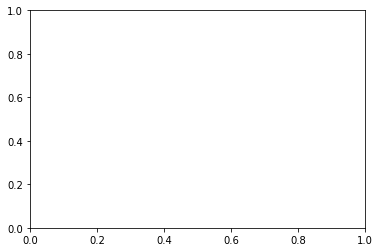

In [97]:
# Plot the coefficients
plt.plot(range(len(df.columns)), lasso_coef)
# plt.xticks(range(len(X)), X.values, rotation=60)
# plt.margins(0.02)
# plt.show()

# Monte_Carlo Definition

In [ ]:
# input dataframe with 2 columns: first: daily closing price; second: daily sentiment analysis

def monte_carlo (df):
    #Create empty list to store R2
    r_square = []
    #Determine number of days
    days , cols = df.shape

    
    #Seperate the Features (X) from the Target (y)
    target_name=df.columns[0]
    y=df.columns[0]
    X=df.drop(columns=target_name)
    
    for x in range(0, days):
        #Split data into training and testing data
        from sklearn.model_selection import train_test_split
#         from sklearn.cross_validation import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size=0.3,
                                                            randome_state=31)
        
        #Create the Lasso Regression Model
        from sklearn.linear_model import Lasso
        import numpy as np
        lasso_model = Lasso()
        lasso.fit(X_train,y_train)
        train_score=lasso.score(X_train,y_train)
        test_score=lasso.score(X_test,y_test)
        coeff_used = np.sum(lasso.coef_!=0)
        
    
    
    return r_square, days_shift

# Lasso Regression Option 2

In [ ]:
#Option 2
#https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499


In [98]:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=0)

In [99]:
#Scale the data as linear models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [100]:
#Run Lasso Regression (LogisticRegression using Lasso (L1) penatly)
#Select features using the selectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
lasso_model = LogisticRegression(C=1, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l1', random_state=None, solver='liblinear', 
                                 tol=0.0001, verbose=0, warm_start=False)
sel_=SelectFromModel(estimator=lasso_model, prefit=False, threshold=None)

In [101]:
#Convert y_train into a category by representing day-to-day return increases as 1 and decreases as 0
import numpy as np
y_train_shift=y_train.shift(1)
y_train_shift[:1]=0
y_train_shift
y_train_cat=np.where(y_train_shift>y_train,0,1)
y_train_cat

array([0, 1, 0, ..., 0, 1, 0])

In [102]:
sel_.fit(scaler.transform(X_train.fillna(0)), y_train_cat)

SelectFromModel(estimator=LogisticRegression(C=1, multi_class='ovr', n_jobs=1,
                                             penalty='l1', solver='liblinear'))

In [103]:
#Show which features were kept
sel_.get_support()

array([ True,  True,  True])

In [104]:
#Report
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 3
selected features: 3
features with coefficients shrank to zero: 0


In [105]:
#Identify remove features
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')

In [106]:
#Remove features from training and test set 
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((6050, 3), (2594, 3))

In [110]:
# Compute and print the coefficients
lasso_coef = sel_.coef_
print(lasso_coef)

AttributeError: 'SelectFromModel' object has no attribute 'coef_'

In [ ]:
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

# From Metin

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)
# Fit the regressor to the data
lasso.fit(X,y)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

# Decision Tree Regression with AdaBoost

In [72]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [81]:
X2=X['shift7']
X2.head()

28    0.000000
29    0.166667
30    0.000000
31   -0.142857
32    0.000000
Name: shift7, dtype: float64

In [82]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=0)

regr_1.fit(X2, y)
regr_2.fit(X2, y)

# Predict
y_1 = regr_1.predict(X2)
y_2 = regr_2.predict(X2)

# Plot the results
plt.figure()
plt.scatter(X2, y, c="k", label="training samples")
plt.plot(X2, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X2, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.16666667  0.         ...  0.01266766 -0.00897719
  0.01009801].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.